## Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## Problem Description

## This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label 

# INTRODUCTION

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic is positive, negative, or neutral.

COVID-19 originally known as Coronavirus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020.

The study analyzes various types of tweets gathered during the pandemic times hence can be useful in policy making to safeguard the countries by demystifying the pertinent facts and information.

In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset/Coronavirus_Tweets.csv', encoding = "ISO-8859-1", engine='python')

# Exploratory Data Analysis (Summary)

1. Original Dataset contains 6 columns and 41157 rows.
2. Location column contains approx 21% of Null values. so, we have      dropped the NaN values.
3. After dropping we have left with 32567 rows and 6 columns.
4. In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".
5.  The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.
6. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.
7. All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.
8. Most of the tweets came from London followed by U.S. 
9. Feature Engineering (Text Cleaning).
10. Model Training(Algorithms used-Logistic Regression, SVM, Random forest     classifier)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# There are Null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
# Dataset summary of object datatype
df.describe(include='O')

,Location,TweetAt,OriginalTweet,Sentiment
count,32567,41157,41157,41157
unique,12220,30,41157,5
top,London,20-03-2020,"Very strong, direct communication https://t.co...",Positive
freq,540,3448,1,11422


In [ ]:
# Checking the % of Null values and duplicate values if any
print(df.isnull().sum()/len(df)*100)
print(df.duplicated().sum() , "Duplicate Values")

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64
0 Duplicate Values


In [ ]:
# Drooping Null values from the dataset
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [ ]:
# Dataset shape after dropping null rows
df.shape

(32567, 7)

In [ ]:
df.isnull().sum()

index            0
UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
# All the tweet came from March and April 2020
df['TweetAt'].value_counts()

20-03-2020    2618
19-03-2020    2614
25-03-2020    2384
18-03-2020    2183
21-03-2020    2066
22-03-2020    1618
23-03-2020    1604
17-03-2020    1555
08-04-2020    1527
07-04-2020    1487
06-04-2020    1372
09-04-2020    1185
24-03-2020    1167
13-04-2020    1148
26-03-2020    1025
05-04-2020     880
10-04-2020     815
02-04-2020     779
11-04-2020     722
03-04-2020     656
04-04-2020     615
12-04-2020     593
16-03-2020     529
01-04-2020     503
27-03-2020     280
31-03-2020     253
14-04-2020     210
29-03-2020      95
30-03-2020      65
28-03-2020      19
Name: TweetAt, dtype: int64

In [ ]:
#There are 12220 unique locations from where tweet came
df['Location'].value_counts()

London                        540
United States                 528
London, England               520
New York, NY                  395
Washington, DC                373
                             ... 
Smallville                      1
Hackney,London                  1
Addu City                       1
Neighbours to #woodburners      1
Manila/Ibiza                    1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# There are 5 unique Sentiment
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

# Exploring more on Tweet and Sentiment

In [ ]:
df[df['Sentiment']=='Extremely Negative']

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
17,20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
22,27,3826,48778,Everywhere You Are!,16-03-2020,This morning I tested positive for Covid 19. I...,Extremely Negative
24,29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
33,42,3841,48793,Houston,16-03-2020,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative
40,50,3849,48801,"Washington, DC",16-03-2020,"""Everything weÂre seeing in the current COVID...",Extremely Negative
...,...,...,...,...,...,...,...
32509,41078,44877,89829,London,14-04-2020,"Sneezed at a grocery store today. The power, t...",Extremely Negative
32521,41098,44897,89849,"Wall Street, SF, Tokyo",14-04-2020,"WSJ: Farmers Dump Milk, Break Eggs as #Coronav...",Extremely Negative
32533,41110,44909,89861,Los Angeles,14-04-2020,Bruh??? It's so truuuuuue! I choked on my own ...,Extremely Negative
32546,41128,44927,89879,"Melbourne, Australia",14-04-2020,The COVID-19 pandemic and global oil price war...,Extremely Negative


In [ ]:
df[df['Sentiment']=='Extremely Negative'].loc[40,'OriginalTweet']

'"Everything weÂ\x92re seeing in the current COVID-19 outbreak has been seen before in previous epidemics and pandemics; the rise of fear, racism, panic buying of food and medicines, conspiracy theories, the proliferation of quack cures" https://t.co/Pr8NpKX41A'

In [ ]:
df[df['Sentiment']=='Negative']

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
7,9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
19,24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
21,26,3825,48777,"Ketchum, Idaho",16-03-2020,In preparation for higher demand and a potenti...,Negative
23,28,3827,48779,"New York, NY",16-03-2020,Do you see malicious price increases in NYC? T...,Negative
27,34,3833,48785,"London, England",16-03-2020,We're sorry to say that our @FinFabUK event is...,Negative
...,...,...,...,...,...,...,...
32544,41124,44923,89875,"San Diego, CA",14-04-2020,With @Topps &amp; @PaniniAmerica shutting down...,Negative
32548,41131,44930,89882,"Accra, Ghana",14-04-2020,In every human affliction there are gainers a...,Negative
32562,41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative
32563,41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative


In [ ]:
df[df['Sentiment']=='Negative'].loc[27,'OriginalTweet']

"We're sorry to say that our @FinFabUK event is being cancelled due to Covid-19. The health and wellbeing of our attendees, speakers and staff is our top priority. Apologies for any disappointment this may cause. All FAQs are answered in the link below:\r\r\nhttps://t.co/GDDPTudCvj"

In [ ]:
df[df['Sentiment']=='Neutral']

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
5,7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
13,16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
14,17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...,...
32551,41134,44933,89885,"Greenville, NC",14-04-2020,The coronavirus has been a breeding ground for...,Neutral
32553,41136,44935,89887,"Pasadena, CA",14-04-2020,How COVID-19 Has Impacted How Consumers Spend ...,Neutral
32557,41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
32559,41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral


In [ ]:
df[df['Sentiment']=='Neutral'].loc[14,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [ ]:
df[df['Sentiment']=='Positive']

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
6,8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
...,...,...,...,...,...,...,...
32552,41135,44934,89886,"New York, NY",14-04-2020,"As physical stores close, clothing retailers a...",Positive
32556,41140,44939,89891,Pakistan,14-04-2020,Good News! \r\r\nWe'll Soon Announce Our High ...,Positive
32560,41145,44944,89896,"Manhattan, NY",14-04-2020,How exactly are we going to re-open New York C...,Positive
32561,41146,44945,89897,"Gurgaon, India",14-04-2020,#Gold prices rose to a more than 7-year high t...,Positive


In [ ]:
df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i'

In [ ]:
df[df['Sentiment']=='Extremely Positive']

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
9,11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
10,12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
15,18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
20,25,3824,48776,London,16-03-2020,UK #consumer poll indicates the majority expec...,Extremely Positive
26,33,3832,48784,"Virginia, USA",16-03-2020,Coronavirus fun fact: if you cough at the groc...,Extremely Positive
...,...,...,...,...,...,...,...
32527,41104,44903,89855,"Philadelphia, PA",14-04-2020,@ldsanty @GovMurphy @EdMorrissey What would yo...,Extremely Positive
32536,41114,44913,89865,"San Francisco, CA",14-04-2020,Can sneakerheads turn a profit during Covid 19...,Extremely Positive
32554,41137,44936,89888,"LES, NYC",14-04-2020,Distilleries have switched portions of their p...,Extremely Positive
32555,41138,44937,89889,"Los Angeles, CA",14-04-2020,HMU FOR PRICES!! Got great deals going right n...,Extremely Positive


In [ ]:
df[df['Sentiment']=='Extremely Positive'].loc[26,'OriginalTweet']

'Coronavirus fun fact: if you cough at the grocery store, you get the whole aisle to yourself pretty quickly.\r\r\n#CoronavirusOutbreak #coronavirus #COVID2019'

# Unique Values in each Feature Column

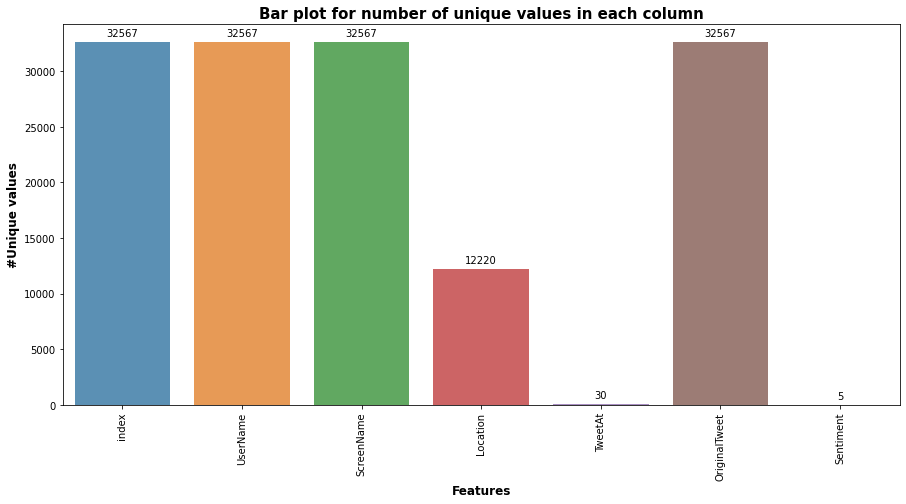

In [ ]:
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Count Plot Sentiment column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


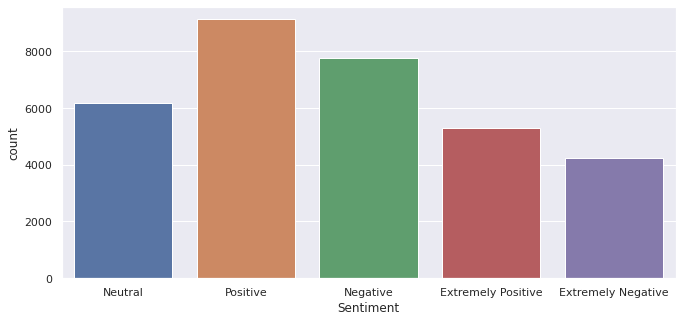

In [ ]:
sns.set(rc={'figure.figsize':(11,5)})
sns.countplot(df['Sentiment'])

Most of the Sentiment is positive. 

# CountPlot for Sentiment according to "TweetAt" column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

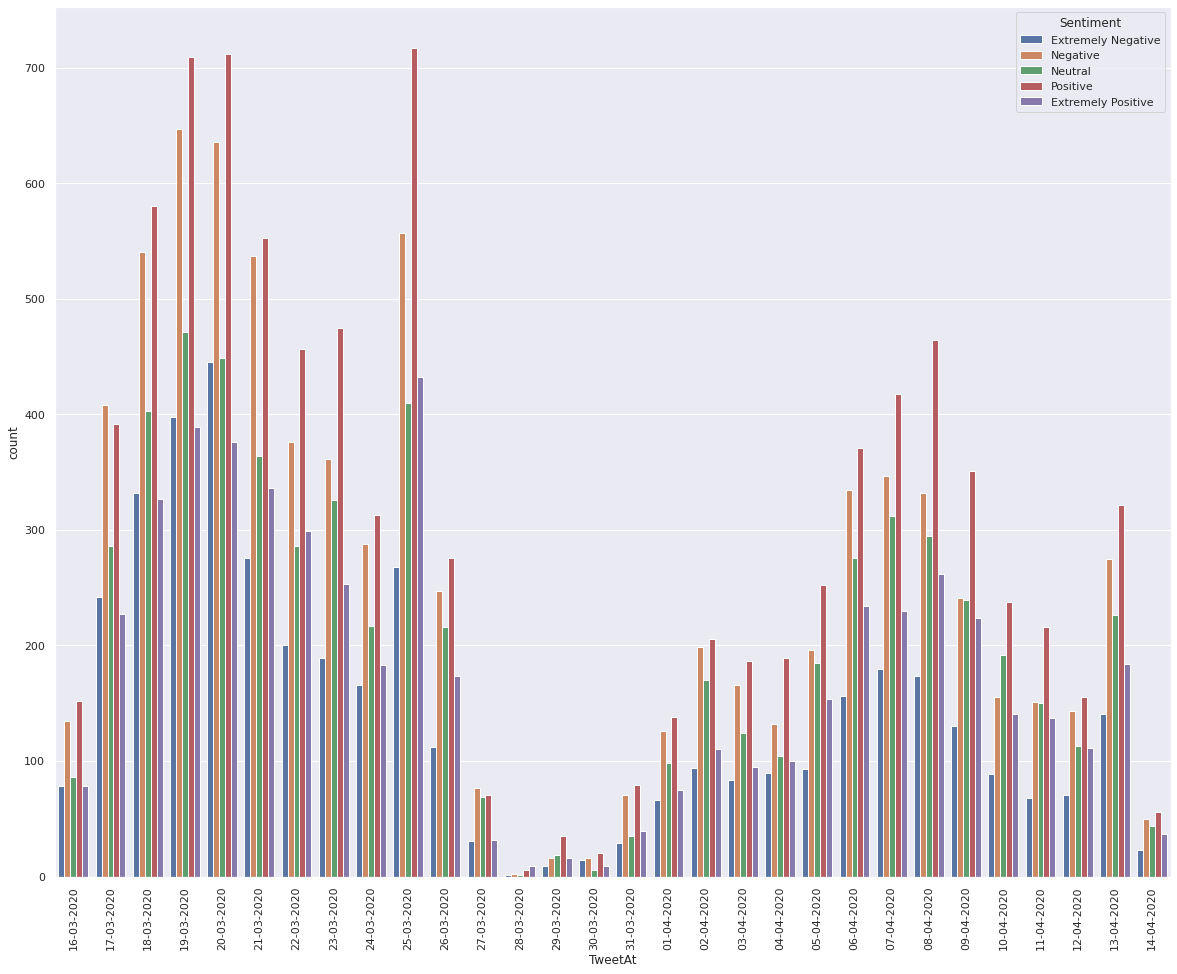

In [ ]:
sns.set(rc={'figure.figsize':(20,16)})
sns.countplot(df.TweetAt,hue=df.Sentiment,hue_order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'])
plt.xticks(rotation = 90)

# CountPlot for OriginalTweet according to "TweetAt" column.

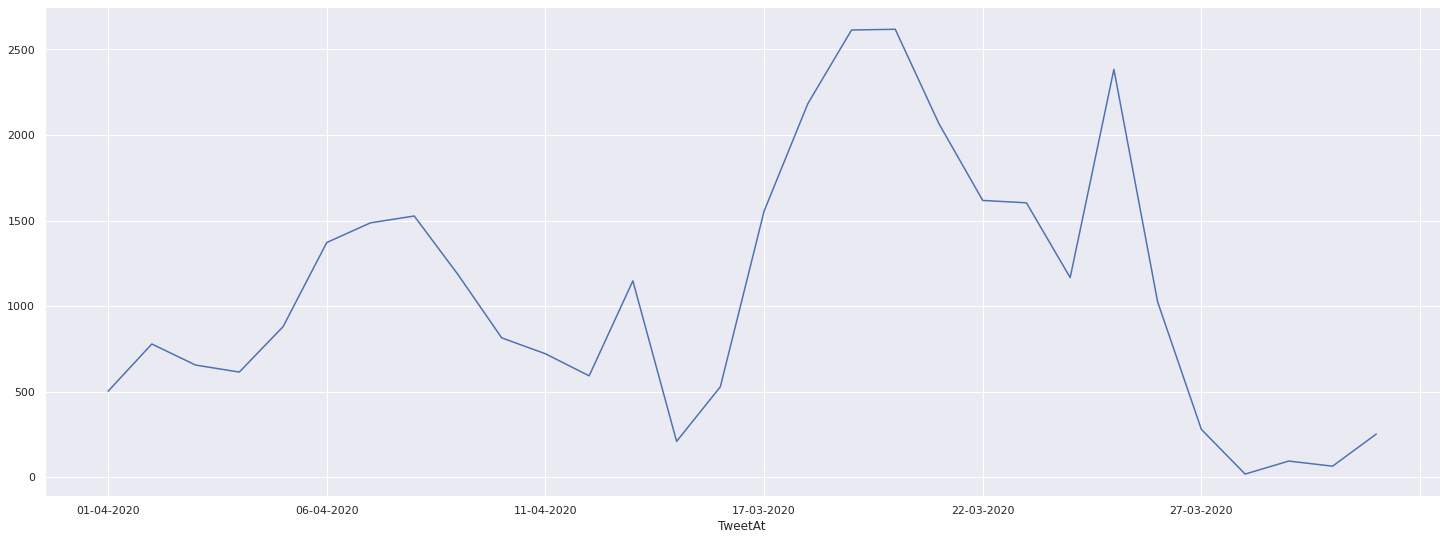

In [ ]:
plt.figure(figsize=(25,9))
grp_tweetAt=df.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

# Histogram plot of the length of OriginalTweet.

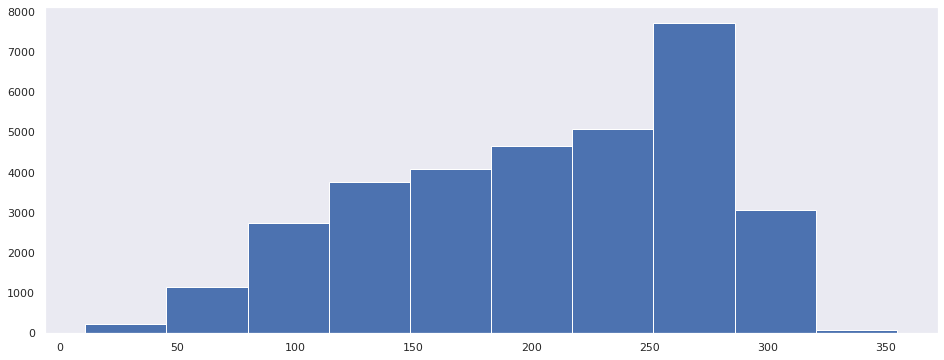

In [ ]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(df['OriginalTweet'].str.len())
plt.show()

# Top 10 Location

In [ ]:
location_top10 = df['Location'].value_counts().sort_values(ascending=False)[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

# Count Plot of Top 10 Location

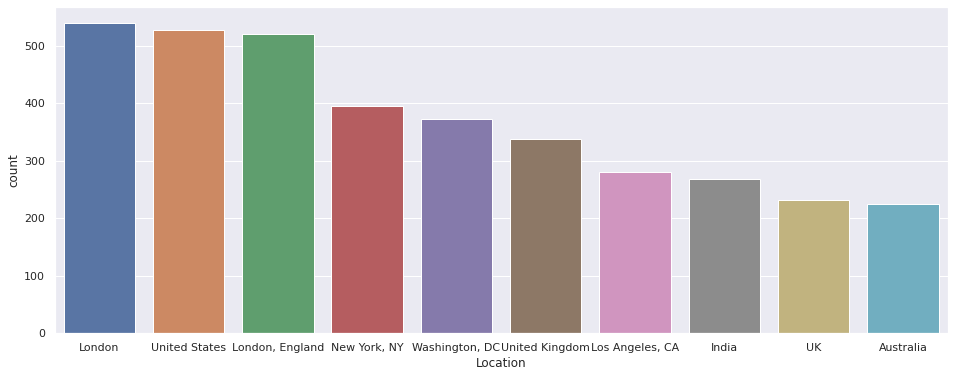

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=df[df['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

# Feature Engineering

In [ ]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [ ]:
import re
def remove_pattern(input_text,pattern):
  r=re.findall(pattern,input_text)
  for i in r:
    input_text=re.sub(i,' ',input_text)
  return input_text


In [ ]:
df["Tweet"]=np.vectorize(remove_pattern)(df['OriginalTweet'],'@[\w]*')

In [ ]:
df.head(2)

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co...
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...


In [ ]:
import string
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [ ]:
df['OriginalTweet'].loc[0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [ ]:
df['Tweet']=df['OriginalTweet'].apply(lambda x: x.lower())
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')
df['Tweet']=df['Tweet'].str.replace('http\S+|www.\S+', '', case=False)
df['Tweet']=df['Tweet'].apply(remove_punctuations)
df['Tweet']=df['Tweet'].apply(lambda x: str(x).replace('s',''))


In [ ]:
df['Tweet'].loc[0]

' menyrbie phil gahan chriitv  t co ifz fan pa and  t co xx ghgfzcc and  t co i nlzdxno '

In [ ]:
df['Tweet']=df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
df['Tweet'].loc[0]

'menyrbie phil gahan chriitv ifz fan and ghgfzcc and nlzdxno'

In [ ]:
tokenized_tweet=df['Tweet'].apply(lambda x: x.split())

In [ ]:
tokenized_tweet

0        [menyrbie, phil, gahan, chriitv, ifz, fan, and...
1        [advice, talk, your, neighbour, family, exchan...
2        [coronaviru, autralia, woolworth, give, elderl...
3        [new, the, region, firt, confirmed, covid, cae...
4        [cahier, grocery, tore, haring, inight, covid,...
                               ...                        
32562    [all, really, hitting, that, much, more, home,...
32563    [till, hocked, the, number, toronto, upermarke...
32564    [never, that, ituation, amp, world, that, goin...
32565    [airline, pilot, offering, tock, upermarket, h...
32566    [tartiicat, well, new, ued, rift, are, going, ...
Name: Tweet, Length: 32567, dtype: object

In [ ]:
import nltk # for text manipulation
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chriitv ifz fan and ghgfzc...
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbour family exchange pho...
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru autralia woolworth give elderly dia...
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,new the region firt confirmed covid cae came o...
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cahier grocery tore haring inight covid prove ...


In [ ]:
tokenized_tweet

0        [menyrbi, phil, gahan, chriitv, ifz, fan, and,...
1        [advic, talk, your, neighbour, famili, exchang...
2        [coronaviru, autralia, woolworth, give, elderl...
3        [new, the, region, firt, confirm, covid, cae, ...
4        [cahier, groceri, tore, hare, inight, covid, p...
                               ...                        
32562    [all, realli, hit, that, much, more, home, cov...
32563    [till, hock, the, number, toronto, upermarket,...
32564    [never, that, ituat, amp, world, that, go, the...
32565    [airlin, pilot, offer, tock, upermarket, helv,...
32566    [tartiicat, well, new, u, rift, are, go, for, ...
Name: Tweet, Length: 32567, dtype: object

In [ ]:

for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] =' '.join(tokenized_tweet[i])



In [ ]:
df['Tweet']=tokenized_tweet

In [ ]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi phil gahan chriitv ifz fan and ghgfzcc...
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru autralia woolworth give elderli dia...
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,new the region firt confirm covid cae came out...
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cahier groceri tore hare inight covid prove cr...


In [ ]:
df['Tweet'].loc[0]

'menyrbi phil gahan chriitv ifz fan and ghgfzcc and nlzdxno'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
df['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0        [e, n, r, b,  , p, h, l,  , g, h, n,  , c, h, ...
1        [v, c,  , l, k,  , u, r,  , n, e, g, h, b, u, ...
2        [c, r, n, v, r, u,  , u, r, l,  , w, l, w, r, ...
3        [n, e, w,  , h, e,  , r, e, g, n,  , f, r,  , ...
4        [c, h, e, r,  , g, r, c, e, r,  , r, e,  , h, ...
                               ...                        
32562    [l, l,  , r, e, l, l,  , h,  , h,  , u, c, h, ...
32563    [l, l,  , h, c, k,  , h, e,  , n, u, b, e, r, ...
32564    [n, e, v, e, r,  , h,  , u,  , p,  , w, r, l, ...
32565    [r, l, n,  , p, l,  , f, f, e, r,  , c, k,  , ...
32566    [r, c,  , w, e, l, l,  , n, e, w,  , u,  , r, ...
Name: Tweet, Length: 32567, dtype: object

In [ ]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbi phil gahan chriitv ifz fan and ghgfzcc...
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advic talk your neighbour famili exchang phone...
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronaviru autralia woolworth give elderli dia...
3,5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,new the region firt confirm covid cae came out...
4,6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cahier groceri tore hare inight covid prove cr...


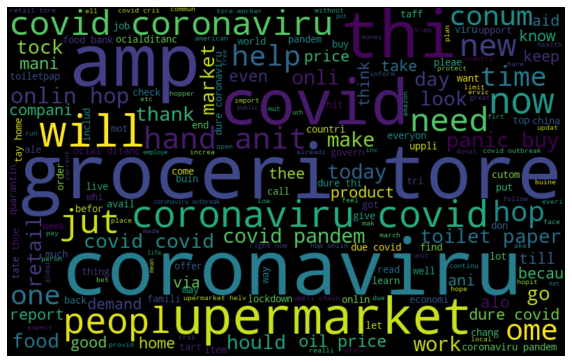

In [ ]:
# create text from all tweets
all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

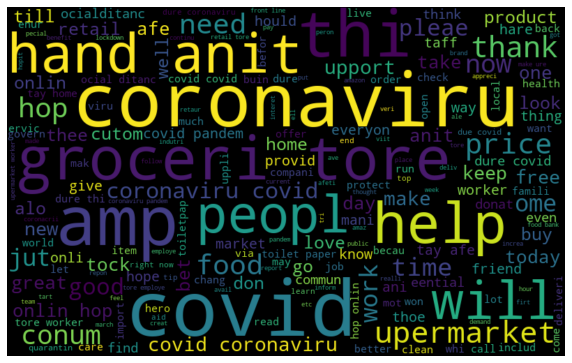

In [ ]:
# create text from  Extremely Positive tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

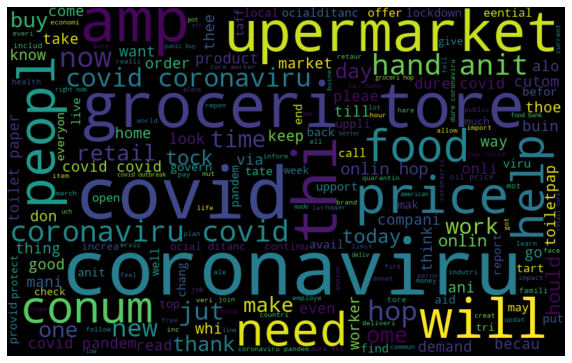

In [ ]:
# create text from  Positive tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

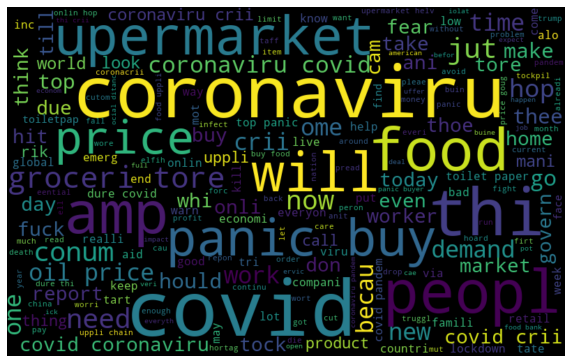

In [ ]:
# create text from  Extremely Negative tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


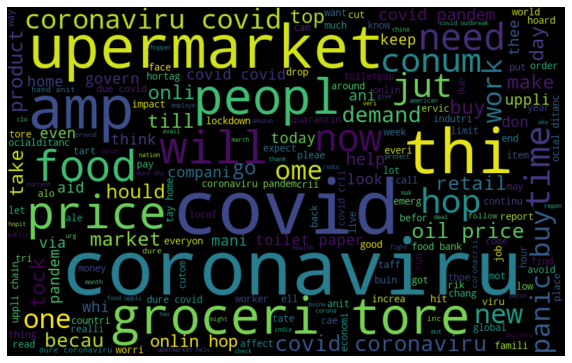

In [ ]:
# create text from  Negative tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

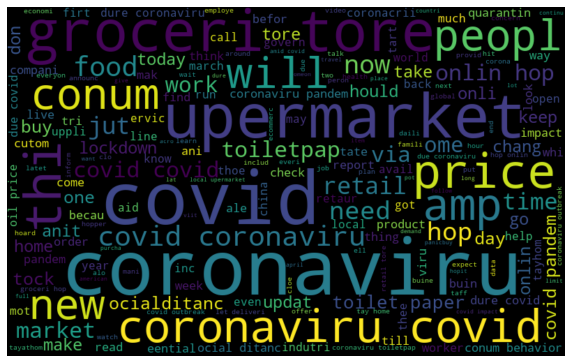

In [ ]:
# create text from  neutral tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_new=df[['Tweet','Sentiment']]

In [ ]:
df_new.head()

,Tweet,Sentiment
0,menyrbi phil gahan chriitv ifz fan and ghgfzcc...,Neutral
1,advic talk your neighbour famili exchang phone...,Positive
2,coronaviru autralia woolworth give elderli dia...,Positive
3,new the region firt confirm covid cae came out...,Positive
4,cahier groceri tore hare inight covid prove cr...,Positive


In [ ]:
df_new['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

In [ ]:
df_new.shape

(32567, 2)

In [ ]:
df_new.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df_new,test_size = 0.2,random_state=0,stratify = df_new.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (26053, 2)
valid shape :  (6514, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
           stop_words='english')

In [ ]:
X_train = tfidf.fit_transform(train.Tweet.values)
X_valid = tfidf.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (26053, 48524)
X_train.shape :  (6514, 48524)
y_train.shape :  (26053,)
y_valid.shape :  (6514,)


# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.525330058335892
                    precision    recall  f1-score   support

Extremely Negative       0.30      0.69      0.42       376
Extremely Positive       0.39      0.73      0.51       568
          Negative       0.49      0.46      0.48      1643
           Neutral       0.71      0.54      0.62      1602
          Positive       0.61      0.48      0.54      2325

          accuracy                           0.53      6514
         macro avg       0.50      0.58      0.51      6514
      weighted avg       0.57      0.53      0.53      6514



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy Score    :  0.8027866272598165
Validation accuracy Score :  0.5640159656125269
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.63      0.54       646
Extremely Positive       0.58      0.68      0.63       903
          Negative       0.50      0.48      0.49      1602
           Neutral       0.60      0.62      0.61      1198
          Positive       0.62      0.52      0.57      2165

          accuracy                           0.56      6514
         macro avg       0.56      0.59      0.57      6514
      weighted avg       0.57      0.56      0.56      6514



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9674893486354739
Validation accuracy Score :  0.5815167331900521
                    precision    recall  f1-score   support

Extremely Negative       0.43      0.70      0.53       523
Extremely Positive       0.54      0.77      0.64       736
          Negative       0.55      0.50      0.52      1720
           Neutral       0.59      0.65      0.62      1130
          Positive       0.69      0.53      0.60      2405

          accuracy                           0.58      6514
         macro avg       0.56      0.63      0.58      6514
      weighted avg       0.60      0.58      0.58      6514



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
0,Support Vector Machines,0.581517
1,Logistic Regression,0.564016
2,Random Forest,0.525330


In [ ]:
df_new.head()

,Tweet,Sentiment
0,menyrbi phil gahan chriitv ifz fan and ghgfzcc...,Neutral
1,advic talk your neighbour famili exchang phone...,Positive
2,coronaviru autralia woolworth give elderli dia...,Positive
3,new the region firt confirm covid cae came out...,Positive
4,cahier groceri tore hare inight covid prove cr...,Positive


# For Binary classification

In [ ]:
feature=df_new.copy()

In [ ]:
feature["Sentiment"]= feature["Sentiment"].replace('Positive',1) 
feature["Sentiment"]= feature["Sentiment"].replace('Extremely Positive',1) 
feature["Sentiment"]= feature["Sentiment"].replace('Neutral',1) 
feature["Sentiment"]= feature["Sentiment"].replace('Negative',0) 
feature["Sentiment"]= feature["Sentiment"].replace('Extremely Negative',0)

In [ ]:
feature['Sentiment'].value_counts()

1    20555
0    12012
Name: Sentiment, dtype: int64

In [ ]:
X=feature.drop('Sentiment',axis=1)
y=feature.Sentiment

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(feature,test_size = 0.2,random_state=0,stratify = feature.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (26053, 2)
valid shape :  (6514, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (26053, 48549)
X_train.shape :  (6514, 48549)
y_train.shape :  (26053,)
y_valid.shape :  (6514,)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.8174700644765122
              precision    recall  f1-score   support

           0       0.65      0.82      0.72      1892
           1       0.92      0.82      0.86      4622

    accuracy                           0.82      6514
   macro avg       0.78      0.82      0.79      6514
weighted avg       0.84      0.82      0.82      6514



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9600429892910606
Validation accuracy Score :  0.842493091802272
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2175
           1       0.90      0.86      0.88      4339

    accuracy                           0.84      6514
   macro avg       0.82      0.84      0.83      6514
weighted avg       0.85      0.84      0.84      6514



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9595823897439835
Validation accuracy Score :  0.8213079521031624
              precision    recall  f1-score   support

           0       0.64      0.84      0.73      1831
           1       0.93      0.81      0.87      4683

    accuracy                           0.82      6514
   macro avg       0.78      0.83      0.80      6514
weighted avg       0.85      0.82      0.83      6514



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy]})
models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.842493
0,Support Vector Machines,0.821308
2,Random Forest,0.817470


In [ ]:
Tweet = ['hospitals are good', 'boy is sad',
         'he fell sick', 'he is not satisfied',
        'he is angry with his behaviour', 'taste of food bad', 'snacks are good']
Tweet = vectorizer.transform(Tweet)
result_logistic = logreg.predict(Tweet)
result_SVM = svc.predict(Tweet)
result_RandomForest =rf_clf.predict(Tweet)
print("Logistic Prediction ",result_logistic)
print("SVM Prediction ",result_SVM)
print("Random Forest Prediction ", result_RandomForest)

Logistic Prediction  [1 1 1 1 1 0 1]
SVM Prediction  [1 1 1 1 1 0 1]
Random Forest Prediction  [1 1 1 1 1 0 1]
